## 연습문제 Day 2 모범답안

- 연습문제 Day 1에서 전처리한 z 파일을 읽고 kbo를 생성합니다.
- kbo 데이터로 상관분석과 t-검정 및 분산분석을 실행합니다.

### 실습 데이터셋 준비

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg
import scikit_posthocs as sp

In [2]:
# 현재 작업 경로를 확인합니다.
# [힌트] getcwd() 함수를 사용하세요.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/PythonAdvanced/exercise'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
# [힌트] chdir() 함수를 사용하세요.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
# [힌트] listdir() 함수를 사용하세요.
os.listdir()

['Used_Cars_Price.z',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price_Prep.z',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv']

In [5]:
# z 파일을 읽고 데이터프레임 kbo를 생성합니다.
# [힌트] joblib.load() 함수를 사용하세요.
kbo = joblib.load(filename = 'KBO_Hitter_2021.z')

In [6]:
# kbo의 정보를 확인합니다.
# [힌트] info() 함수를 사용하세요.
kbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 299
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     194 non-null    object 
 1   팀명      194 non-null    object 
 2   경기      194 non-null    int64  
 3   타석      194 non-null    int64  
 4   타수      194 non-null    int64  
 5   안타      194 non-null    int64  
 6   홈런      194 non-null    int64  
 7   득점      194 non-null    int64  
 8   타점      194 non-null    int64  
 9   볼넷      194 non-null    int64  
 10  삼진      194 non-null    int64  
 11  도루      194 non-null    int64  
 12  BABIP   194 non-null    float64
 13  타율      194 non-null    float64
 14  출루율     194 non-null    float64
 15  장타율     194 non-null    float64
 16  OPS     194 non-null    float64
 17  wOBA    194 non-null    float64
 18  WAR     194 non-null    float64
 19  올스타     194 non-null    object 
dtypes: float64(7), int64(10), object(3)
memory usage: 31.8+ KB


In [7]:
# kbo의 처음 5행을 출력합니다.
# [힌트] head() 함수를 사용하세요.
kbo.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,올스타
0,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.10,나눔
1,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.06,나눔
2,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.97,드림
3,최정,SSG,134,555,436,121,35,92,100,84,102,8,0.277,0.278,0.410,0.562,0.972,0.425,6.83,드림
4,양의지,NC,141,570,480,156,30,81,111,69,60,2,0.315,0.325,0.414,0.581,0.995,0.432,6.48,나눔


### 피어슨 상관분석

kbo에서 실수형 열을 선택하고 OPS와의 피어슨 상관분석을 실행합니다.

In [8]:
# kbo의 열별 자료형을 출력합니다.
# [힌트] dtypes 속성을 사용하세요.
kbo.dtypes

선수명       object
팀명        object
경기         int64
타석         int64
타수         int64
안타         int64
홈런         int64
득점         int64
타점         int64
볼넷         int64
삼진         int64
도루         int64
BABIP    float64
타율       float64
출루율      float64
장타율      float64
OPS      float64
wOBA     float64
WAR      float64
올스타       object
dtype: object

In [9]:
# kbo에서 열별 자료형이 실수형이면 True, 아니면 False인 시리즈 locs를 생성합니다.
# [힌트] eq() 함수를 사용하세요.
locs = kbo.dtypes.eq('float64')

In [10]:
# locs를 출력합니다.
locs

선수명      False
팀명       False
경기       False
타석       False
타수       False
안타       False
홈런       False
득점       False
타점       False
볼넷       False
삼진       False
도루       False
BABIP     True
타율        True
출루율       True
장타율       True
OPS       True
wOBA      True
WAR       True
올스타      False
dtype: bool

In [11]:
# kbo에서 실수형 변수만 선택합니다.
# [힌트] loc 인덱서를 추가하고 열 위치에 locs를 지정하세요.
kbo.loc[:, locs]

,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,0.393,0.328,0.456,0.408,0.864,0.412,7.10
1,0.373,0.360,0.438,0.522,0.960,0.429,7.06
2,0.385,0.347,0.451,0.521,0.972,0.434,6.97
3,0.277,0.278,0.410,0.562,0.972,0.425,6.83
4,0.315,0.325,0.414,0.581,0.995,0.432,6.48
...,...,...,...,...,...,...,...
295,0.311,0.239,0.275,0.321,0.596,0.270,-0.76
296,0.198,0.158,0.248,0.254,0.502,0.241,-0.90
297,0.264,0.175,0.238,0.228,0.466,0.224,-0.96
298,0.217,0.143,0.218,0.224,0.442,0.213,-0.96


In [12]:
# kbo의 실수형 변수와 OPS의 피어슨 상관분석을 실행하고 유의확률을 출력합니다.
# [힌트] apply() 함수에 lambda 표현식으로 pg.corr() 함수를 실행하세요.
# [참고] 데이터프레임의 열별로 함수를 반복 실행하므로 axis 매개변수를 생략합니다.(기본값: 0)
# [힌트] pg.corr() 함수 실행 결과에서 'p-val'을 인덱싱하세요.
# 마지막에 round() 함수를 추가하면 반올림한 결과를 반환합니다.
kbo.loc[:, locs].apply(func = lambda x: pg.corr(x = x, y = kbo['OPS'])['p-val']).round(4)

,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
pearson,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# kbo의 실수형 변수와 OPS의 피어슨 상관분석을 실행하고 상관계수를 출력합니다.
kbo.loc[:, locs].apply(func = lambda x: pg.corr(x = x, y = kbo['OPS'])['r']).round(4)

,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
pearson,0.5756,0.8372,0.8289,0.9477,1.0,0.9751,0.7825


### t-검정: 올스타

kbo의 올스타 범주별 OPS의 평균이 같은지 확인합니다.

In [14]:
# kbo의 올스타 범주별 OPS의 평균을 확인합니다.
kbo.groupby(by = ['올스타'])['OPS'].mean()

올스타
나눔    0.659202
드림    0.723000
Name: OPS, dtype: float64

In [15]:
# kbo의 올스타 범주별 OPS의 정규성 검정을 실행합니다.
# [힌트] pg.normality() 함수에 사용하세요.
# [참고] method를 생략하면 인수의 기본값인 'shapiro'를 적용합니다.
pg.normality(data = kbo, dv = 'OPS', group = '올스타')

,W,pval,normal
나눔,0.986279,0.363086,True
드림,0.980158,0.185272,True


In [16]:
# (정규성 가정 만족) kbo의 올스타 범주별 OPS의 등분산성 검정을 실행합니다.
# [힌트] pg.homoscedasticity() 함수를 사용하세요.
# [참고] method를 생략하면 인수의 기본값인 'levene'을 적용합니다.
pg.homoscedasticity(data = kbo, dv = 'OPS', group = '올스타')

,W,pval,equal_var
levene,1.666605,0.198266,True


In [17]:
# 올스타 원소의 중복을 제거한 values를 생성합니다.
# [힌트] unique() 함수를 사용하세요.
values = kbo['올스타'].unique()

In [18]:
# values를 출력합니다.
values

array(['나눔', '드림'], dtype=object)

In [19]:
# kbo의 올스타 범주별 OPS를 시리즈 sp1과 sp2로 생성합니다.
# [힌트] 리스트 컴프리헨션과 eq() 함수를 사용하세요.
sp1, sp2 = [kbo['OPS'][kbo['올스타'].eq(v)] for v in values]

In [20]:
# 등분산 검정 결과에 따라 등분산 또는 이분산 가정된 t-검정을 실행합니다.
# [힌트] pg.ttest() 함수를 사용하세요.
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.771473,192,two-sided,0.000216,"[-0.1, -0.03]",0.542968,102.029,0.96348


In [21]:
# (정규성 가정 불만족) 맨-휘트니 U 검정을 실행합니다.
# [힌트] pg.mwu() 함수를 사용하세요.
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,3315.5,two-sided,0.00047,0.29156,0.35422


### 데이터 전처리

KBO 시청율 상위 3팀('KIA', '롯데', '한화')을 선택하여 teams를 생성합니다.

In [22]:
# 'KIA', '롯데', '한화'를 원소로 갖는 리스트 top3를 생성합니다.
top3 = ['KIA', '롯데', '한화']

In [23]:
# 팀명이 top3의 원소일 때 True, 아니면 False인 부울형 시리즈 locs를 생성합니다.
# [힌트] isin() 함수를 사용하세요.
locs = kbo['팀명'].isin(values = top3)

In [24]:
# locs에서 True의 개수를 출력합니다.
# [힌트] sum() 함수를 사용하세요.
locs.sum()

60

In [25]:
# kbo에서 locs가 True인 행을 선택하고 teams에 할당합니다.
# [참고] 데이터프레임에서 행을 선택할 때 loc 인덱서를 추가 또는 생략할 수 있습니다.
teams = kbo[locs]

In [26]:
# teams의 행 길이를 출력합니다.
# [힌트] shape 속성의 첫 번째 원소를 인덱싱하세요.
teams.shape[0]

60

### 데이터 시각화

teams의 팀명 범주별 OPS로 상자 수염 그림을 그리고 <br>
OPS의 평균이 같은지 시각적으로 확인합니다.

In [27]:
# 시각화 관련 모듈을 호출합니다.
from GraphicSetting import *
import HelloDataScience as hds

In [28]:
# 기본 팔레트를 'Set1'으로 설정합니다.
# [힌트] sns.set_palette() 함수를 사용하세요.
sns.set_palette(palette = 'Set1', n_colors = 9)

In [29]:
# 기본 팔레트 색을 출력합니다.
# [힌트] sns.color_palette() 함수를 사용하세요.
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

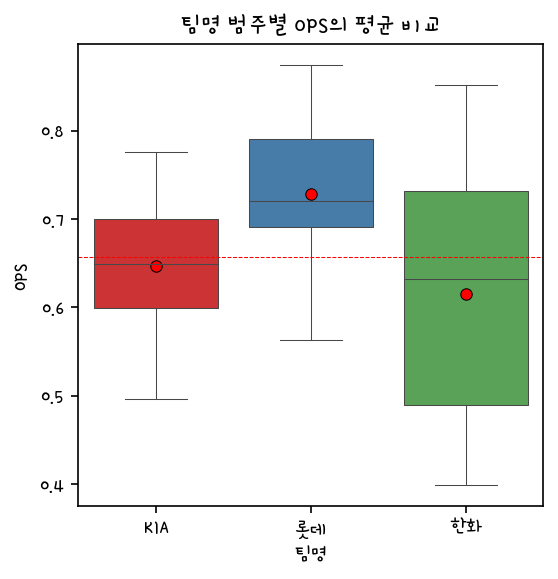

In [30]:
# 팀명의 범주별 OPS의 분포를 비교합니다.
# [힌트] hds.plot_box_group() 함수를 사용하세요.
hds.plot_box_group(data = teams, x = '팀명', y = 'OPS')

### 분산분석: 팀명

teams의 팀명 범주별 OPS 평균이 같은지 확인합니다.

In [31]:
# teams의 팀명 범주별 OPS의 평균을 확인합니다.
teams.groupby(by = ['팀명'])['OPS'].mean()

팀명
KIA    0.646778
롯데     0.728765
한화     0.614880
Name: OPS, dtype: float64

In [32]:
# teams의 팀명 범주별 OPS의 정규성 검정을 실행합니다.
# [힌트] pg.normality() 함수에 사용하세요.
# [참고] method를 생략하면 인수의 기본값인 'shapiro'를 적용합니다.
pg.normality(data = teams, dv = 'OPS', group = '팀명')

,W,pval,normal
롯데,0.970012,0.818653,True
한화,0.953909,0.306497,True
KIA,0.968616,0.771305,True


In [33]:
# (정규성 가정 만족) teams의 팀명 범주별 OPS의 등분산성 검정을 실행합니다.
# [힌트] pg.homoscedasticity() 함수를 사용하세요.
pg.homoscedasticity(data = teams, dv = 'OPS', group = '팀명')

,W,pval,equal_var
levene,5.556486,0.006243,False


In [34]:
# 등분산 검정 결과에 따라 등분산 또는 이분산 가정된 분산분석을 실행합니다.
# [힌트] pg.anova() 또는 pg.welch_anova() 함수를 사용하세요.
pg.welch_anova(data = teams, dv = 'OPS', between = '팀명')

,Source,ddof1,ddof2,F,p-unc,np2
0,팀명,2,37.737181,6.834187,0.002931,0.165067


In [35]:
# (정규성 가정 불만족) 크루스칼-왈리스 순위합 검정을 실행합니다.
# [힌트] pg.kruskal() 함수를 사용하세요.
pg.kruskal(data = teams, dv = 'OPS', between = '팀명')

,Source,ddof1,H,p-unc
Kruskal,팀명,2,9.085054,0.010646


### 사후분석

두 범주별로 묶어서 OPS의 평균이 같은지 확인합니다.

In [36]:
# Tukey 방식으로 사후분석을 실행합니다.
# [힌트] pg.pairwise_tukey() 함수를 사용하세요.
sp.posthoc_tukey(a = teams, val_col = 'OPS', group_col = '팀명')

,롯데,한화,KIA
롯데,1.000000,0.004356,0.075596
한화,0.004356,1.000000,0.604895
KIA,0.075596,0.604895,1.000000


In [37]:
# Scheffe 방식으로 사후분석을 실행합니다.
# [힌트] pg.pairwise_tukey() 함수를 사용하세요.
sp.posthoc_scheffe(a = teams, val_col = 'OPS', group_col = '팀명')

,롯데,한화,KIA
롯데,1.000000,0.006396,0.093153
한화,0.006396,1.000000,0.640845
KIA,0.093153,0.640845,1.000000


## End of Document